# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in the data science process, focusing on summarizing, visualizing, and understanding the underlying structure of a dataset before formal modeling. EDA involves statistical techniques and visualization tools like histograms, scatter plots, box plots, and correlation matrices to uncover patterns, spot anomalies, test assumptions, and check for missing data. This iterative process helps form hypotheses, guide feature selection, and inform modeling strategies. EDA is valuable because it enables data scientists to address data quality issues, identify key variables, and gain insights that might otherwise remain hidden.

Consider a dataset containing housing prices and various features like size, location, and number of bedrooms. Through EDA, we might discover that location and size have a strong correlation with price, while the number of bedrooms shows no significant influence. Without EDA, these relationships might be overlooked, leading to suboptimal model performance or incorrect conclusions.

In this notebook we will make use of the technique to unravel sociological and economical characteristics of countries, discover relationships between popular metrics and see what real-life consequences do they induce. But before we get ahead of ourselves, we first need data on which EDA analysis will be conducted. For this I chose the following datasets.

___________________________________________

## Datasets

### Countries of the World
The dataset is provided by the US government, and is open source inside the US. Use outside the US necessitates approval from the government, but if acquired from World [Factbook](https://www.cia.gov/the-world-factbook/), then is public domain. The dataset can be downloaded from the following link: https://www.kaggle.com/datasets/fernandol/countries-of-the-world/data

In [4]:
import pandas as pd

# Load Countries of the World (CW) from file
cw = pd.read_csv('countries.csv')

# Drop information that we will not use
cw = cw.drop(['Coastline', 'Infant mortality', 'Phones', 'Crops', 'Other'], axis=1)

# Create a new column for total GDP by multiplying GDP per capita with population
cw['GDP'] = cw['GDP per capita'] * cw['Population']

# Visualize dataset
cw.head(10)

,Country,Region,Population,Area,Pop.Density,Net migration,GDP per capita,Literacy,Arable,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","23,06",700.0,"36,0","12,13",1,"46,6","20,34","0,38","0,24","0,38",2.173990e+10
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","-4,93",4500.0,"86,5","21,09",3,"15,11","5,22","0,232","0,188","0,579",1.611745e+10
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","-0,39",6000.0,"70,0","3,22",1,"17,14","4,61","0,101","0,6","0,298",1.975805e+11
3,American Samoa,OCEANIA,57794,199,"290,4","-20,71",8000.0,"97,0",10,2,"22,46","3,27",NaN,NaN,NaN,4.623520e+08
4,Andorra,WESTERN EUROPE,71201,468,"152,1","6,6",19000.0,"100,0","2,22",3,"8,71","6,25",NaN,NaN,NaN,1.352819e+09
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7",0,1900.0,"42,0","2,41",NaN,"45,11","24,2","0,096","0,658","0,246",2.304143e+10
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","10,76",8600.0,"95,0",0,2,"14,17","5,34","0,04","0,18","0,78",1.159022e+08
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","-6,15",11000.0,"89,0","18,18",2,"16,93","5,37","0,038","0,22","0,743",7.601880e+08
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,61",11200.0,"97,1","12,31",3,"16,73","7,55","0,095","0,358","0,547",4.471245e+11
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","-6,47",3500.0,"98,6","17,55",4,"12,07","8,23","0,239","0,343","0,418",1.041730e+10


### Global Salary Data

The dataset contains a comprehensive salary data collected through web scraping from [SalaryExplorer](https://www.salaryexplorer.com/), a trusted source for salary comparison. The data has been processed and converted to US Dollars (USD).

The dataset convers a wide range of salary statistics (namely average, median, lowest and highest salaries), for various countries worldwide. It offers potential for the following use cases:

- **Salary Analysis:** Explore salary trends, disparities, and variations across countries, industries, and job roles. Identify countries with the highest average salaries or those with competitive salary offerings.

- **Statistical Research:** by conducting statistical analyses to gain insights into salary distributions, standard deviations, and outliers. Such example is exploring income inequality, or exploring relationships between regions and economic factors.

- **Data Visualization:** by creating informative charts, graphs, and maps to visually represent salary data in an engaging and comprehensible manner.

Link to dataset: https://www.kaggle.com/datasets/fernandol/countries-of-the-world/data

In [6]:
import pandas as pd

# Load Global Salaries Data (GSD) from file
gsd = pd.read_csv('salary_data.csv')
gsd.drop('wage_span', axis=1, inplace=True)

# Where is the lowest salary in the world
print(gsd[gsd['lowest_salary'] == gsd['lowest_salary'].min()]['Country'])

# Where is the highest salary in the world
print(gsd[gsd['highest_salary'] == gsd['highest_salary'].max()]['Country'])

# Visualize dataset
gsd.head(10)

219    Zambia
Name: Country, dtype: object
192    Switzerland
Name: Country, dtype: object


,Country,continent_name,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,853.74,1001.15,252.53,4460.97
1,Aland Islands,Europe,3319.24,3858.35,972.52,17124.74
2,Albania,Europe,832.84,956.92,241.22,4258.49
3,Algeria,Africa,1148.84,1308.81,330.11,5824.18
4,American Samoa,Oceania,1390.00,1570.00,400.00,6980.00
5,Andorra,Europe,3668.08,4069.77,1120.51,17653.28
6,Angola,Africa,284.39,314.39,79.32,1403.96
7,Antigua and Barbuda,Caribbean,1548.15,1677.78,422.22,7444.44
8,Argentina,South America,110.28,129.42,32.57,577.13
9,Armenia,Asia,1700.25,1974.32,497.39,8780.39






### Salary by Job Title and Country

This dataset provides a comprehensive collection of salary information from various industries and regions across the globe. Sourced from reputable employment websites and surveys, it includes details on *job titles, salaries, job sectors, geographic locations*, and more. By analysing this data, we may gain insight into **job market trends**, compare compensation across different professions, and inform ourselves about career strategies. The dataset was cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes.

Link to the dataset: https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country?select=Salary_Data_Based_country_and_race.csv

In [8]:
import pandas as pd

# Load Salary by Job Title and Country (SJTC) from file
sjtc = pd.read_csv('salary_samples.csv', index_col=0)

# Show sample for each data
sjtc.head(10)

,Age,Gender,Education,Job,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,USA,Hispanic
6,42.0,Female,Master's,Product Manager,12.0,120000.0,USA,Asian
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0,China,Korean
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,China,Chinese
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0,Australia,Australian


_______________________________________________________

## Data Cleaning

During *Exploratory Data Analysis*, cleaning the data is a crucial step to ensure that the dataset is accurate, complete and ready for analysis. Data cleaning involves identifying and correcting issues that may influence the insights derived from the data, such as missing values, outliers, inconsistencies, and duplicates.

One aspect of data cleaning is identifying and managing **outliers**. Outliers are data points that significantly deviate from the rest of the dataset and can skey statistical analyses. In our case, while outliers represent valid cases, it might alter conclusions drawn. Therefore, they should be excluded during certain surveys.

**Inconsistent data** also needs to be addressed during the cleaning process. This refers to discrepancies in data formats, units of measurement, or categorical labels. For example, if a column contains both “USA” and “United States” as values for the country, these need to be standardized. Cleaning inconsistent data helps in making the dataset homogeneous and reliable.

Another essential task is removing **duplicate records**. Duplicates can arise due to data entry errors or multiple records representing the same entity. Inconsistent duplicates may lead to misleading results or bias in analysis. Identifying and removing these duplicates ensures that the data represents unique observations.

Finally, data **transformation** is sometimes necessary. This includes converting data types and normalizing or scaling numerical features to bring them to comparable ranges. These transformations help to improve the performance of analytical models and ensure that data is in a suitable format for statistical analysis or machine learning algorithms.

In [154]:
from eda_utils import standard_clean, remove_outliers

# First let's drop duplicates
cw.drop_duplicates(inplace=True)

# Separate numeric and word data types
string_columns = ['Country', 'Region']

# Perform standard cleaning procedure
cw = standard_clean(cw, string_columns)

# Drop NaN values
cw.dropna(inplace=True)

cw.head()

,Country,Region,Population,Area,Pop.Density,Net migration,GDP per capita,Literacy,Arable,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP
0,afghanistan,asia (ex. near east),31056997,647500,48.0,23.06,700.0,36.0,12.13,1.0,46.60,20.34,0.380,0.240,0.380,2.173990e+10
1,albania,eastern europe,3581655,28748,124.6,-4.93,4500.0,86.5,21.09,3.0,15.11,5.22,0.232,0.188,0.579,1.611745e+10
2,algeria,northern africa,32930091,2381740,13.8,-0.39,6000.0,70.0,3.22,1.0,17.14,4.61,0.101,0.600,0.298,1.975805e+11
6,anguilla,latin amer. & carib,13477,102,132.1,10.76,8600.0,95.0,0.00,2.0,14.17,5.34,0.040,0.180,0.780,1.159022e+08
7,antigua & barbuda,latin amer. & carib,69108,443,156.0,-6.15,11000.0,89.0,18.18,2.0,16.93,5.37,0.038,0.220,0.743,7.601880e+08


In [45]:
from eda_utils import standard_clean

# First let's drop duplicates
gsd.drop_duplicates(inplace=True)

# Rename columns conform to other datasets
rename_map = {"country_name": "Country", 'continent_name': 'Continent', 'median_salary': 'Median', 'average_salary': 'Average', 'lowest_salary':'Lowest', 'highest_salary': 'Highest'}

# Separate numeric and word data types
string_columns = ['Country', 'Continent']

# Perform standard cleaning procedure
gsd = standard_clean(gsd, string_columns, rename_map)

# Drop NaN values
gsd.dropna(inplace=True)

gsd.describe()

,Median,Average,Lowest,Highest
count,221.000000,221.000000,221.000000,221.000000
mean,1762.631906,1982.339812,502.783204,8802.165619
std,1634.708716,1835.429193,470.073328,8140.210641
min,0.261335,0.285524,0.072092,1.271103
25%,567.210000,651.000000,163.930000,2900.480000
50%,1227.460000,1344.230000,339.450000,5974.360000
75%,2389.010000,2740.000000,690.000000,12050.740000
max,9836.070000,11292.900000,2850.270000,50363.930000


In [46]:
from eda_utils import standard_clean

# First let's drop duplicates
sjtc.drop_duplicates(inplace=True)

# Standardize education type
sjtc['Education'] = sjtc['Education'].replace("Bachelor's Degree", "Bachelor's").replace("Master's Degree", "Master's").replace("phD", "PhD")

# Separate numeric and word data types
string_columns = ['Country', 'Gender', 'Education', 'Job', 'Race']

# Perform standard cleaning procedure
sjtc = standard_clean(sjtc, string_columns)

# Drop NaN values
sjtc.dropna(inplace=True)

sjtc.describe()

,Age,Years of Experience,Salary
count,5149.000000,5149.000000,5149.000000
mean,33.999223,8.335211,114257.586327
std,7.763376,6.233781,52463.800698
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,113334.000000
75%,39.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


## Statistic summary

As part of the EDA method, we first have to provide a data summery. This entails calculating the *mean, average, lower* and *upper bound* for numerical properties. This is called **anchoring**, creating expectations that make clear instances, that diverge from our expectations.

Furthermore, we ought to use visualization tools such as diagrams, so we can undertake statistical analysis on the entire dataset. Using histograms, we will not only discover properties discussed previously, but also report on other, arguably more important features as well such as *standard deviation* and *variance*. We may proceed exploring variables one by one.

Let's create a function that plots the distribution of column variables in our dataset. This function will be used in the future, to plot distributions for numerical values.

### Countries of the World

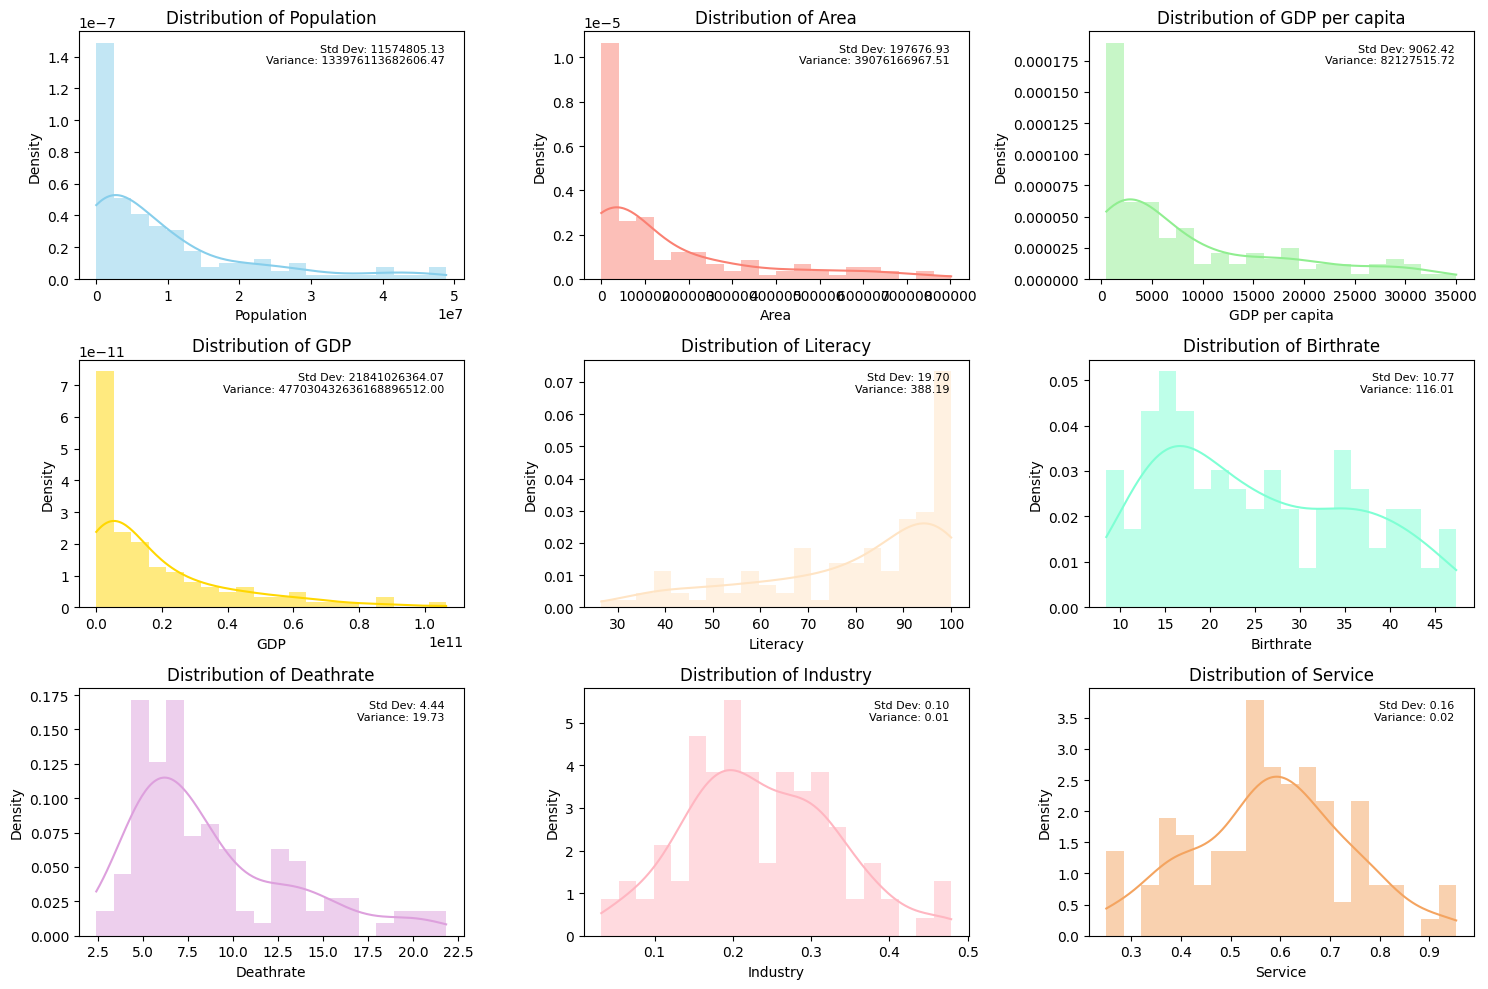

In [12]:
from eda_utils import plot_distributions_grid

# Columns to be plotted
columns = ['Population', 'Area', 'GDP per capita', 'GDP', 'Literacy', 'Birthrate', 'Deathrate', 'Industry', 'Service']

# Plot distribution of numerical values in the dataset.
plot_distributions_grid(cw, columns, layout=(3, 3), bins=20)

The histograms reveal that most of the numerical properties exhibit positive skewness, indicating that the majority of countries have lower values for these properties, with a few outliers displaying significantly higher values. This skewness is a common characteristic in many real-world datasets, reflecting inherent disparities and uneven distributions.

- **Population, Area, GDP, and GDP per Capita**: These variables exhibit strong negative skewness, with long tails towards higher values. This is expected due to the existence of a few countries with exceptionally large populations, vast territories, and high economic output. These outliers significantly influence the shape of the distributions.

- **Literacy**: The literacy distribution is positively skewed, as while most countries have high literacy rates, there are still a few with lower rates, contributing to the tail on the right side.

- **Birthrate and Deathrate**: Both distributions are negatively skewed, indicating that a few countries have significantly higher birth and death rates compared to the majority. This can be attributed to factors such as healthcare access, economic conditions, and cultural norms.

- **Industry and Service**: These variables, representing the contributions of different sectors to GDP, also exhibit positive skewness. This suggests that a few countries have larger industrial and service sectors compared to the majority, reflecting varying levels of economic development and specialization.

Note, that altough some variables show very similar structure, this is not infer a correlating relationship between variables. Correlation only occurs if the same countries are located in a similar place in both distributions. Otherwise, a country can be close to the expected value in one distribution, while in another is considered an outlier, while both distributions retain the same structure.

In spite of this, comparing shapes of distributions is a first step for assessing a correlating relationship between attributes. Therefore, superposing two distribution curves is often considered as a necessary step during EDA.

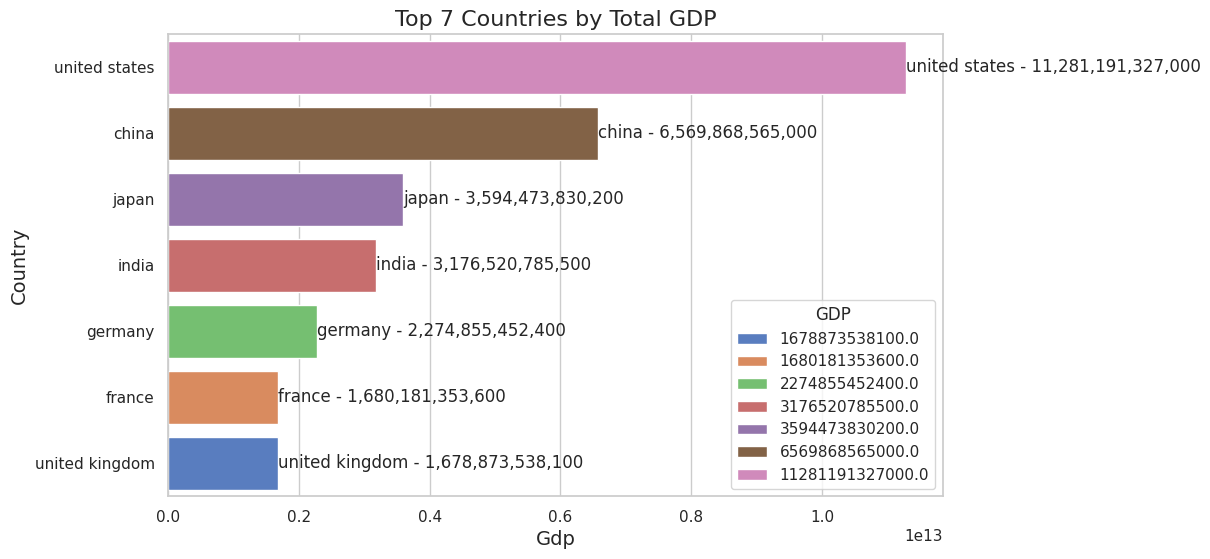

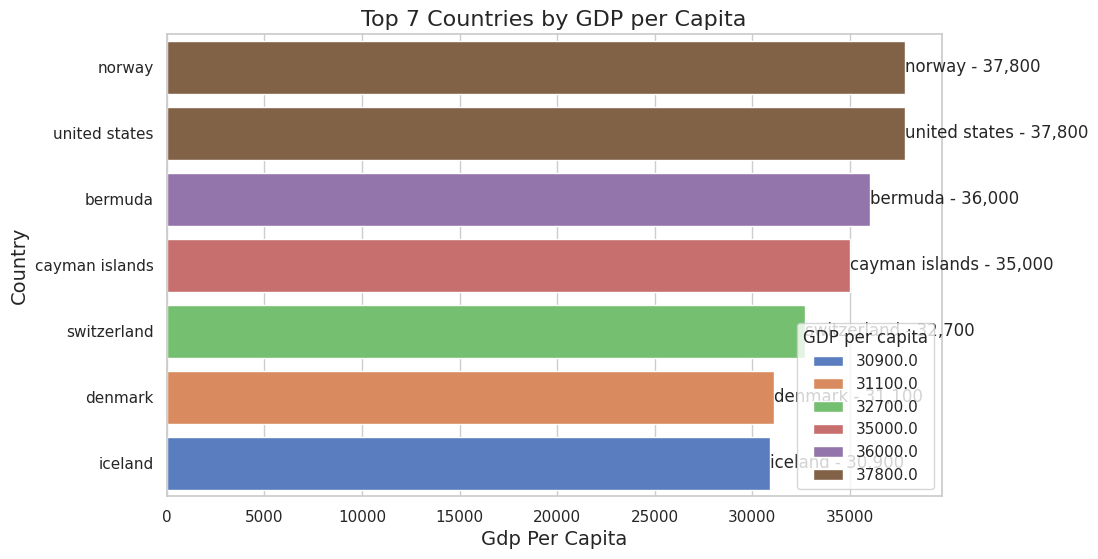

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Define a function to create a bar chart with labels
def top_countries(df, column, title, color):
    top = df.nlargest(7, column)
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=top, x=column, y='Country', hue=column, palette='muted')
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(column.replace('_', ' ').title(), fontsize=14)
    ax.set_ylabel("Country", fontsize=14)

    # Label each bar with the country's name and value
    for i in range(len(top)):
        ax.text(top[column].iloc[i] + 0.02, i, f"{top['Country'].iloc[i]} - {top[column].iloc[i]:,.0f}", va='center')
    plt.show()

# Plotting top countries in each category
top_countries(cw, 'GDP', 'Top 7 Countries by Total GDP', 'blue')
top_countries(cw, 'GDP per capita', 'Top 7 Countries by GDP per Capita', 'green')

As we can see, at the extremes, GDP and GPD per capita do not correlate. This is because population has a high impact on the countries GPD. For a long time, before the industrial revolution, China had the highest GPD in the world, due to its pure size and population. Nowadays, as we can see countries with less population by orders of magnitude, are rivaling the Asian behemoth.

After the industrial revolution, due to the steam engine, physical labor demand plummeted, and the job market shifted into new industries, which were more productive. This gave birth to the GDP per capita metric, since this could measure **how productive the average citizen is** in a country. Higher productiveness equates to more goods produces, which in turn are consumed. Therefore, a **higher GPD per capita correlates with higher standard of living**, as necessities are easily satisfied by goods in the market. Consequently, we can see that the high GPD per capita countries are those known to have a high standard of living as well.

So countries, in order to increase their economy, should increase GPD per capita, as well as the population in the country, both of which are hard to influence. So let's see what other properties relate to GPD per capita, that might be easier to influence. We can do this by using a **correlation matrix**.

This **correlation matrix** reveals relationships between variables (e.g., GDP per capita, population density, literacy) and can provide insights into how different features of countries relate to each other. Let me know if you need more analysis on specific correlations!

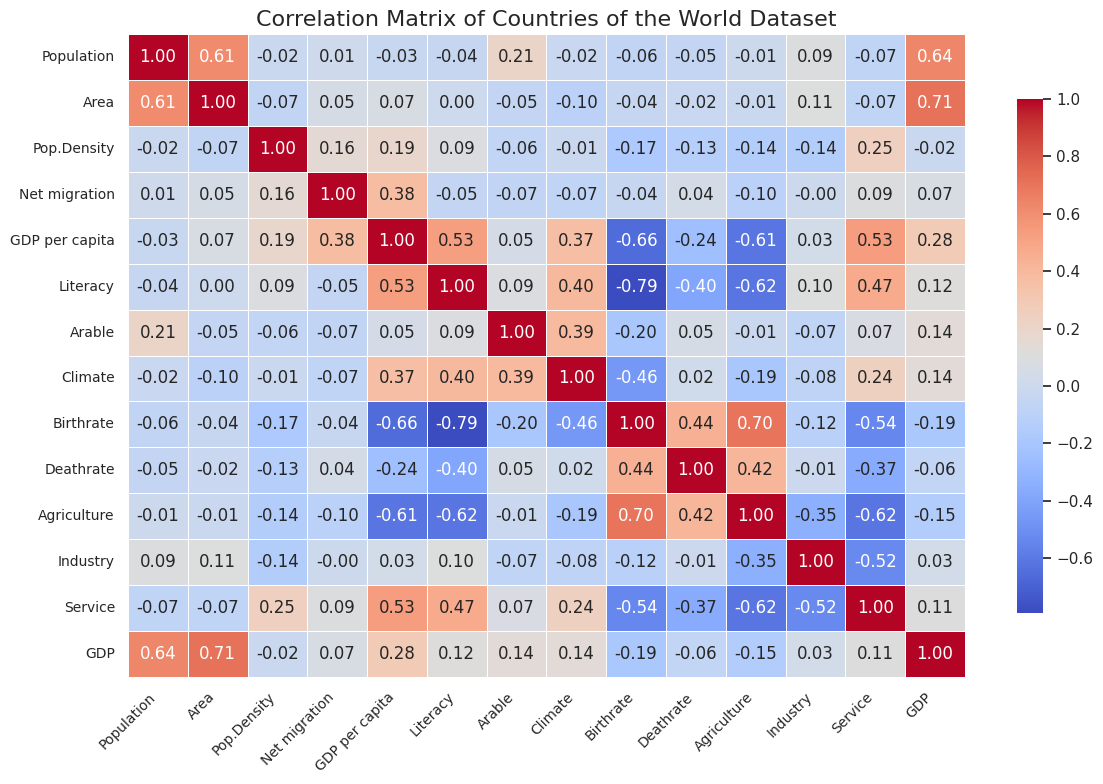

In [163]:
import matplotlib.pyplot as plt

# Select only numerical columns for correlation matrix
numerical_df = cw.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})

# Customize plot
plt.title("Correlation Matrix of Countries of the World Dataset", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

del numerical_df, correlation_matrix

A value of |r| between 0.5 and 0.7 indicates a clear and significant relationship, one variable can reliably predict the other to some extent. The observed correlations in the **Correlation matrix** cna be explained by underlying socio-economic and demographic principles:

- **Birth rate - Literacy: (-0.79)** Higher literacy rates are often associated with better access to education, particularly for women. Not having started a family by 16, but instead pursuing higher academical opportunities may delay child bare by 4-10 years, and consequently reduce the number of children in a family, but also increase the gap between generations. Furthermore, educated individuals are more likely to understand and use family planning methods, resulting in lower bright rates.

- **Birth rate and GPD per capita (-0.65):** Wealthier countries can afford better healthcare and educational institutions. Better access to healthcare means, that children have better survival changes, hence families are not required to proliferate to uphold the socio-demographic concerns, and shifts towards smaller family norms.

- **GPD and Population (0.64):** As discussed, larger populations can contribute to higher GDP due to a bigger workforce and larger markets. Countries with larger populations may have greater economic output due to higher consumption and industrial activity, driving up GDP.

- **GPD and area (0.56):** Larger countries often have more natural resources, which can significantly contribute to GDP (e.g., oil, minerals, agriculture)

- **GDP per capita and Service (0.55):** High-income countries often have economies dominated by the service sector (e.g., finance, education, healthcare, technology), which is more profitable and productive than agriculture or manufacturing. A strong service industry reflects an advanced economy, where the population is generally wealthier, leading to higher GDP per capita

- **GPD per capita and literacy (0.51):** High literacy rates are essential for workforce productivity, innovation, and efficient governance, all of which contribute to higher GDP per capita. Therefore,  countries with high literacy rates are often better developed, providing education and skills that enable individuals to contribute to economic growth.

The relationships are not absolute (correlation ≠ causation) but reflect trends consistent with global patterns of development. For example, countries transitioning from agrarian to industrial/service-based economies tend to experience shifts in these variables over time.

### Global Salary Data

We will use histograms to visualize the distribution of median, average, highest, and lowest salaries across all countries. Each histogram helps visualize the distribution for each salary metric across countries, revealing insights like skewness, outliers, and typical salary ranges.

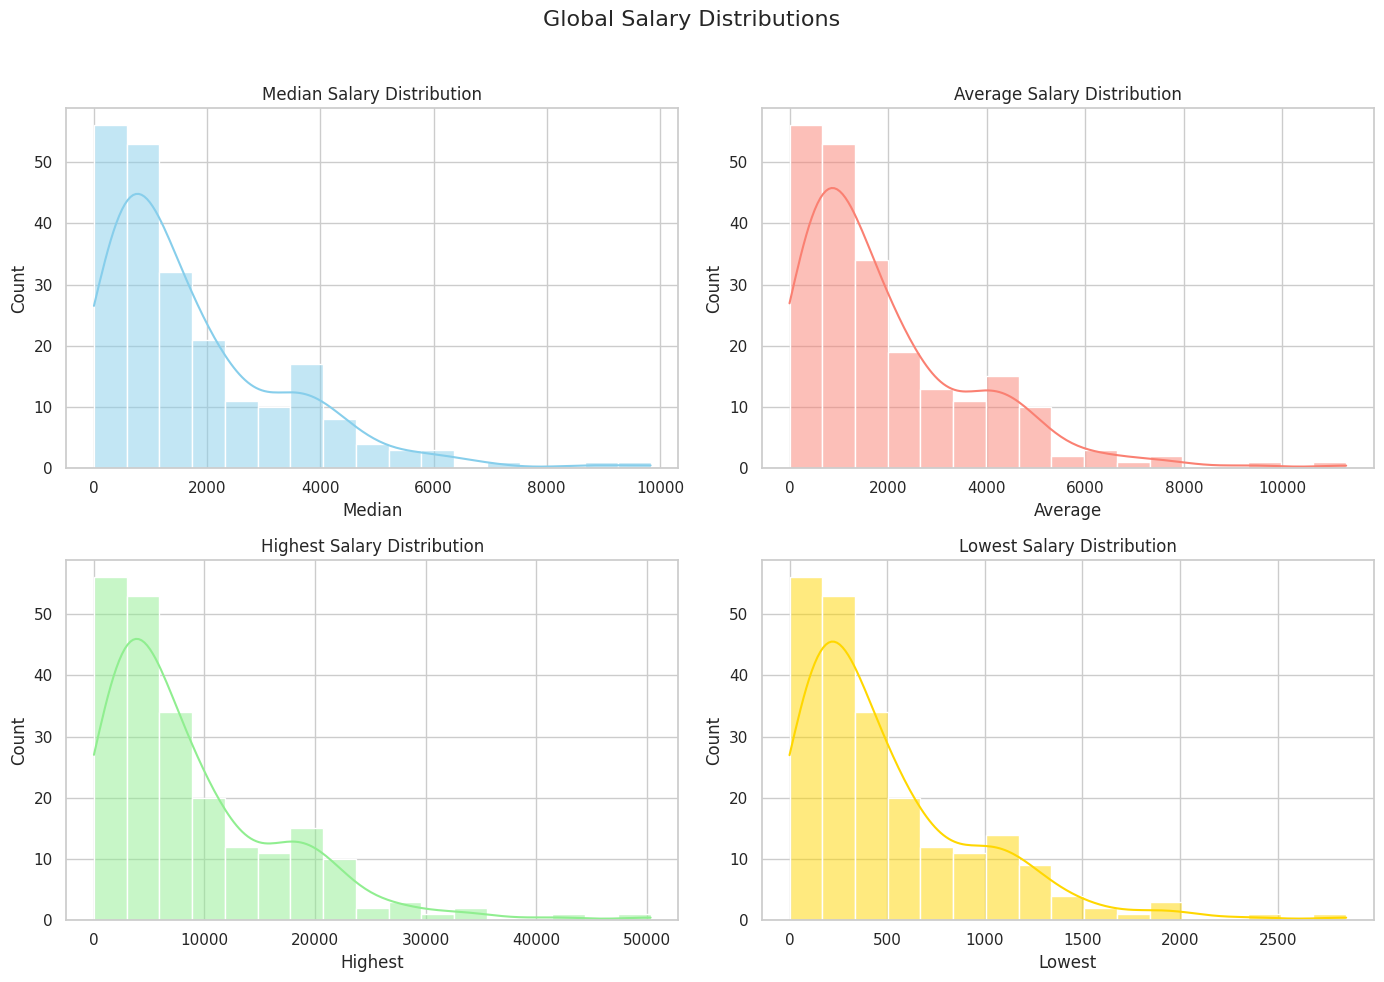

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Global Salary Distributions', fontsize=16)

# Median Salary Distribution
sns.histplot(gsd['Median'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Median Salary Distribution')

# Average Salary Distribution
sns.histplot(gsd['Average'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Average Salary Distribution')

# Highest Salary Distribution
sns.histplot(gsd['Highest'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Highest Salary Distribution')

# Lowest Salary Distribution
sns.histplot(gsd['Lowest'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Lowest Salary Distribution')

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Contrary to our expectations, a high correlation between GPD per capital and median salary is not observed on the diagrams. While Europe shows a high correlation with low variance, in Asia, Oceania and in the Caribbean, a high variance is shown, while in *South America* no noticeable correlation is observed, due to several factors:

- **Sociological Structure**: Socio-Economic status and standard of living of certain demographics does not allow for education, which is shows to correlate with GPD per capita. Without GPD, countries fail to uphold their institutions, leading to economical instability, and lower wages. Despite this certain countries still impose heavy taxation, to pursue their agenda.

- **Economic Structure**: The specific economic structure of a country, the level of industrialization and modernization, including the relative importance of different sectors, can influence the relationship between GDP per capita and median salary.

In the diagrams above, we can clearly observe that low GPD per capita and median salary countries, referred as poor countries, have higher variance. These data points are referred to as *Third World* countries, and the variance is due to several factors, some of which are:

- **Income Inequality**: Countries with lower GDP per capita often have higher levels of income inequality. This means that the gap between the highest and lowest earners is wider, leading to a greater variance in median salaries.

- **Economic Volatility**: Countries with lower GDP per capita may be more susceptible to economic shocks, such as natural disasters or political instability. These shocks can lead to significant fluctuations in income levels and, consequently, in median salaries.   

- **Diverse Economic Structures**: Countries with lower GDP per capita may have more diverse economic structures, with some sectors experiencing rapid growth while others stagnate. This can lead to significant variation in wages across different sectors.

South America in particular has very low correlation between GPD per capita and median wages. Hypothetical reasons could be, that many South American economies are heavily reliant on the primary sector, such as agriculture and mining. While these sectors can generate significant wealth, they often employ a large number of low-skilled workers, leading to lower average wages.

Also, significant portion of the South American workforce is employed in the informal economy, where wages are often unregulated and lower than in the formal sector. This can distort the relationship between GDP per capita and median salary.

Some countries, such as Chile and Uruguay, have made significant progress in reducing income inequality and improving economic conditions, while others continue to struggle with these challenges.

## Salary by Job and Title

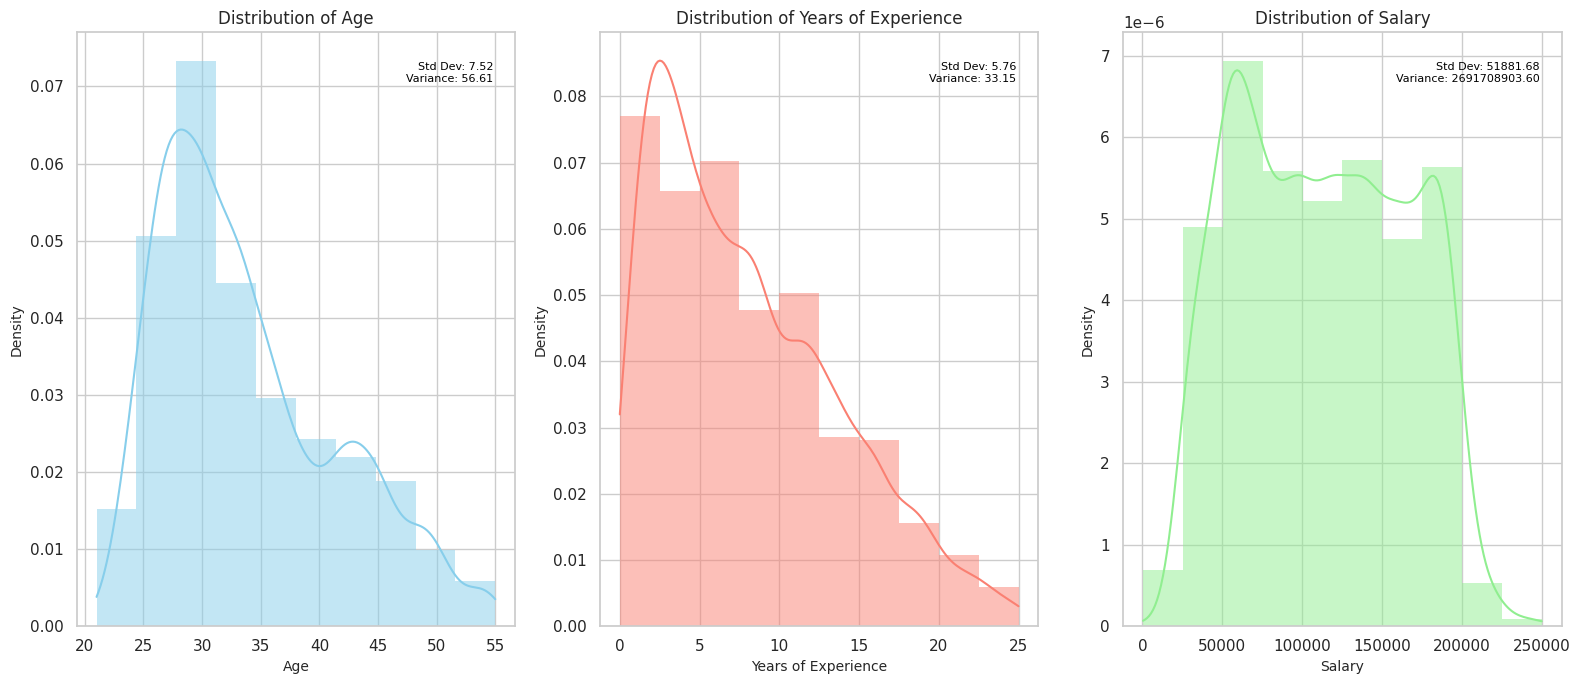

In [16]:
from eda_utils import plot_distributions_grid

# Columns to be plotted
columns = ['Age', 'Years of Experience', 'Salary']

# Plot distribution of numerical values in the dataset.
plot_distributions_grid(sjtc, columns, layout=(1, 3), bins=10, figsize=(16, 7))

All three distributions exhibit positive skewness, meaning the tail of the distribution extends to the right. This suggests that a majority of individuals in the dataset have lower values for these attributes, with a few outliers having significantly higher values.

- **Age**: The distribution of age is positively skewed, with a peak around the age of 30-35. This indicates that a significant portion of the workforce in our dataset is in the early to mid-career stages. The tail extending to the right suggests the presence of older, more experienced individuals.

- **Years of Experience**: The distribution of years of experience is also positively skewed, with a peak around 5-10 years. This aligns with the age distribution, indicating that many individuals have 5-10 years of experience in their current roles. The tail extending to the right suggests the presence of highly experienced individuals.

- **Salary**: The distribution of salary is positively skewed, with a long tail towards higher salary values. This indicates that a few individuals earn significantly higher salaries compared to the majority. This could be due to factors like seniority, expertise, or role in the organization.

In case of a high correlation between **Years of Experience** and **Distribution of Salary**, we ought to observe a similarity in shape between the two distributions. Although similar distribution do not entail high correlation, the opposite is not true, in case of high correlations (>=0.8).



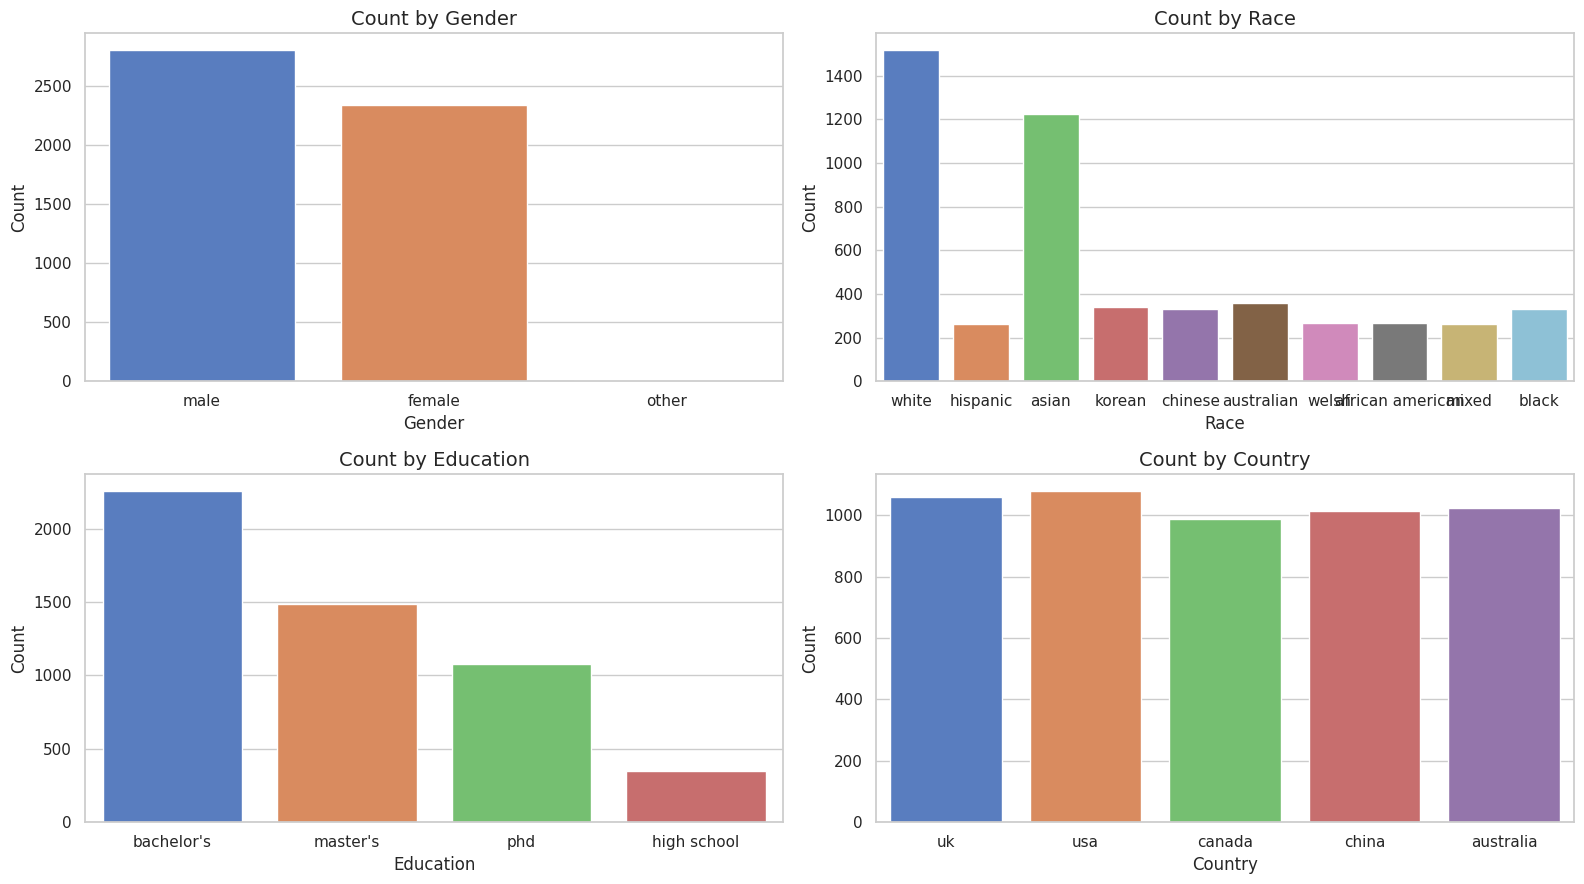

In [17]:
from eda_utils import plot_group_counts

# Columns that represent groups
columns = ['Gender', 'Race', 'Education', 'Country']

# Plot bar chars to count groups
plot_group_counts(sjtc, columns, grid_shape=(2, 2), figsize=(16, 9))

We have now gathered an important insight about our dataset.

- **Gender**: There are more males entries than female entries in our dataset. Furthermore, there are a few records labeled 'Other'. Filtering out these records before calculating gender pay gap will be essential.

- **Race**: Our dataset has an imbalanced amount of white and asian people.

- **Education**: The dataset reflects that in modern countries (or industrialized countries) there are many more skilled people, as education plays an important part in modernization. Whether strong economies can afford education, or education leads to strong economies remains to be seen.

- **Country**: This dataset offers data points only for wealthy countries. Here we consider China as wealthy as samples we surveyed only from educational institutions. Therefore, we might encounter biases by taking only a subsample of the population.



Non the least, taking into account the Salary distribution above, and the Global Salary Distribution dataset, we might add, that the above countries (UK, USA, Canada, China and Australia), have a very high salaries compared to the world.

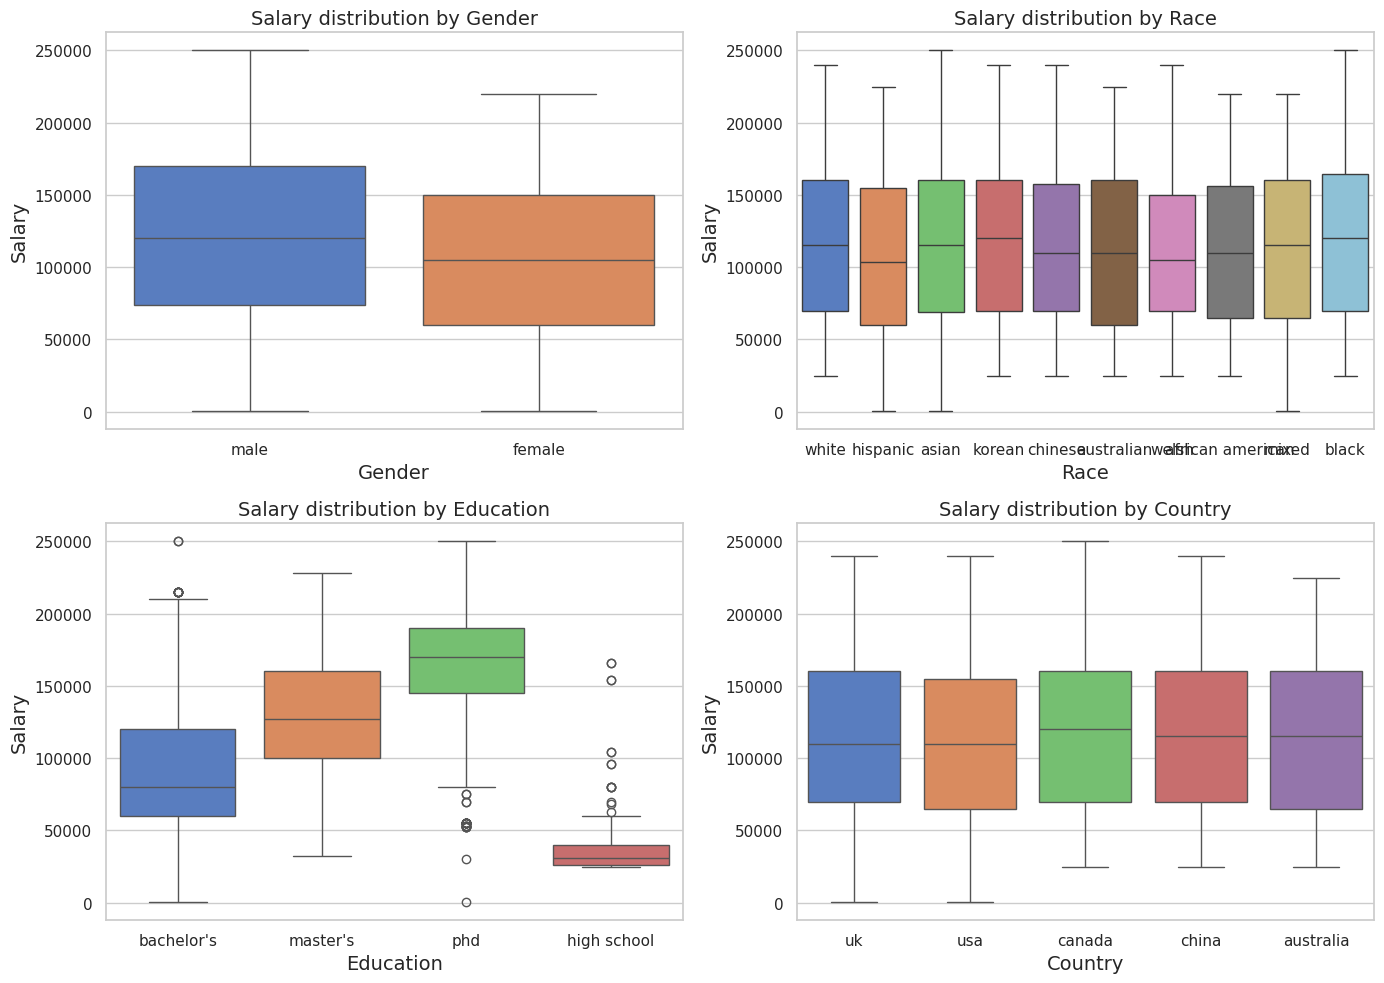

In [18]:
# Filter out 'Other' gender category
sjtc = sjtc[sjtc['Gender'] != 'other']

# Define x-axis groupings
grouping_columns = ['Gender', 'Race', 'Education', 'Country']

# Create 2x2 grid layout for the box plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot each box plot in the grid
for i, grouping in enumerate(grouping_columns):
    sns.boxplot(data=sjtc, x=grouping, y='Salary', ax=axes[i], palette='muted', hue=grouping)
    axes[i].set_title(f"Salary distribution by {grouping}", fontsize=14)
    axes[i].set_xlabel(grouping.title(), fontsize=14)
    axes[i].set_ylabel('Salary', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

del grouping_columns

The provided violin plots offer valuable insights into the distribution of salaries across various demographic groups.

- **Gender**: The plot shows that males have a higher median salary then females, while most of the females gather around the first quartile in their respective distribution. The slight extension of the male distribution towards higher salaries indicates that, on average, males tend to earn slightly more than females.

- **Race**: hile some groups exhibit similar salary distributions, others have more distinct patterns. For instance hispanics, like women, tend to peak around the first quartile. We can also see that hispanics in particular have a lower meadian salary. Black, white and asian and korean have similar salaries.

- **Education** The salary distribution by education level shows a clear trend: higher levels of education are associated with higher salaries. Individuals with a Ph.D. tend to have the highest median salary, followed by those with a master's degree, bachelor's degree, and finally, high school education.

- **Country**: The salary distribution by country reveals significant differences in salary levels across various nations. Individuals from the US and Canada tend to have higher median salaries compared to those from China and Australia.

----------

Here lies an interesting opportunity to explore the **gender pay gap conjecture**. But first we need a strategy on how to calculate accurately. Our objective is to take out of the equation as many influencing factors as possible, such as:

- *Job Title:* Different professions earn different rates of income.
- *Years of Experience:* It is senseless to compare a senior with a junior within a profession
- *Education:* Education level plays a huge impact on the revenue.
- *Country of Residence:* A carpenter will earn different rates in different countries.
- *Hours worked:* More hours spent on the job earns a higher salary.

We will not debate whether income inequality is legitimate, as this topic is much more complex and implicates a lot of nuances. Instead, we will focus on exploring analytics about our data for gender categories. Our hypothesis is that, **without enough data we can not enforce assumptions**, even so in high deviation cases, as we suspect that there are not enough samples.

Regarding the strategy for calculating gender pay gap, we will use the following formula:
$$ Pag Gap = {MedianSalary(Men) - MedianSalary(Women) \over MedianSalary(Men)} * 100 $$

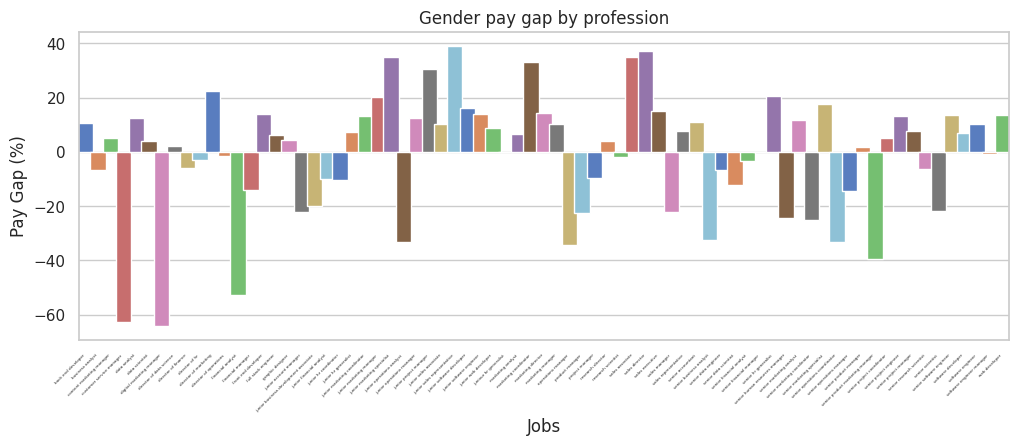

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning
data = sjtc.dropna(subset=['Gender', 'Salary', 'Job', 'Years of Experience', 'Education'])

# Filter out 'Other' gender category
data = data[data['Gender'] != 'other']

# Group by Profession and Gender
avg_salary_by_job = data.groupby(['Job', 'Gender'])['Salary'].mean().unstack('Gender').dropna()

# Calculate pay gap where there is information about both
avg_salary_by_job['Pay Gap'] = ((avg_salary_by_job['male'] - avg_salary_by_job['female']) / avg_salary_by_job['male']) * 100.0

# Merge the pay gap back into the original dataframe
data = data.merge(avg_salary_by_job['Pay Gap'], on='Job', how='left')

# Create new variable that will be plotted
gender_pay_gap = data.groupby('Job')['Pay Gap'].mean().dropna()

# Average Pay Gap by Job Title
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(ax=ax, x=gender_pay_gap.index, y=gender_pay_gap.values,
            hue=gender_pay_gap.index, palette='muted', width=1.2)
plt.xlabel('Jobs')
plt.ylabel('Pay Gap (%)')
plt.xticks(rotation=45, ha='right', fontsize=3)
plt.title('Gender pay gap by profession')
plt.show()

del avg_salary_by_job, gender_pay_gap

In the diagram above each bar corresponds to a profession, while the value represents how much higher salaries do men earn than women, expressed in percentages. Negative values signify, that women tend to earn more in that profession.

Strategic alterations were made, to compensate for the lack of data in each category. Therefore, numerical categories, such as years of experience, were ignore, as even when grouped by 10 years, there were not enough samples in each group, furthermore, groups by 10 are already biased, as years of experience shows a high deviation for revenue.

By taking out influencing factors mentioned above, the dataset was segmented into such small groups that there are not enough samples to make a statistically accurate estimation. Picking less and smaller segments inevitable leads to biases, and therefore incorrect conclusions. Even while having enough data to group people by one variable, further groupings will lead to sparse categories, sensitive to high deviations.

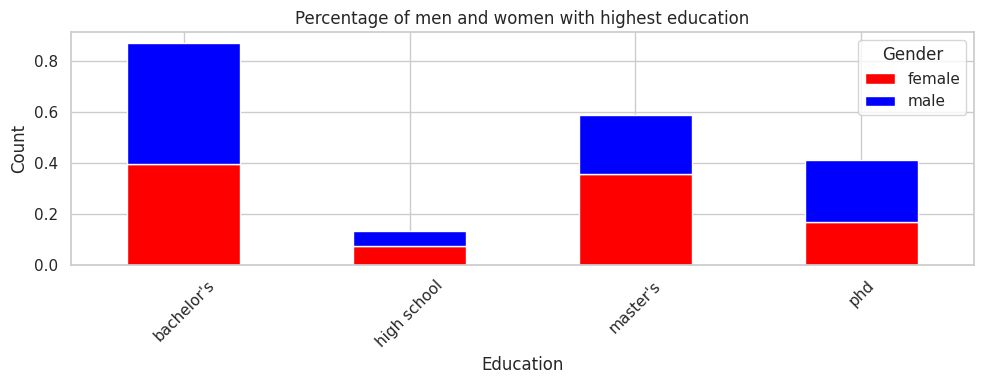

In [20]:
# Education for both man and women normalized
edu_counts = data.groupby(['Education', 'Gender']).size().unstack()

# Normalize for the total amount of survey entries.
edu_counts['female'] = edu_counts['female'] / edu_counts['female'].sum()
edu_counts['male'] = edu_counts['male'] / edu_counts['male'].sum()

# Plot Quantity of Men and Women with Different Degrees
edu_counts.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(10, 4))
plt.title('Percentage of men and women with highest education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

del edu_counts

The above diagram derives from the bar char *Count by Education*, and shows the proportion of men and women at each education level. The values were normalized with the total amount of men, therefore it accurately shows the proportions of man and women tendencies, disregarding the total number of men and women that have taken the survey. This means, that the total area of red and blue rectangles is equal.

The bar plot shows, that in total there are as many females with at least Master's degree as are men, but more men pursue a PhD degree. But women are underrepresented in higher education altogether. This discovery might be one reason why men tend to have higher salaries than women, as we have previously seen, literacy and salary has a high correlation.

---

To identify the professions with the best career advancement opportunities we will use **linear regression** to infer the function between years of experience and salary. Then computing the **area under the linear regression line** for each profession, we may determine what professions offer the highest net worth.

This conjecture does not take into account that *some professions require an additional background*. For example, a CEO constitutes as a high earning profession title, but it requires previous career advancement in another profession, in leadership, multiple degrees, or previous *entrepreneurship*.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

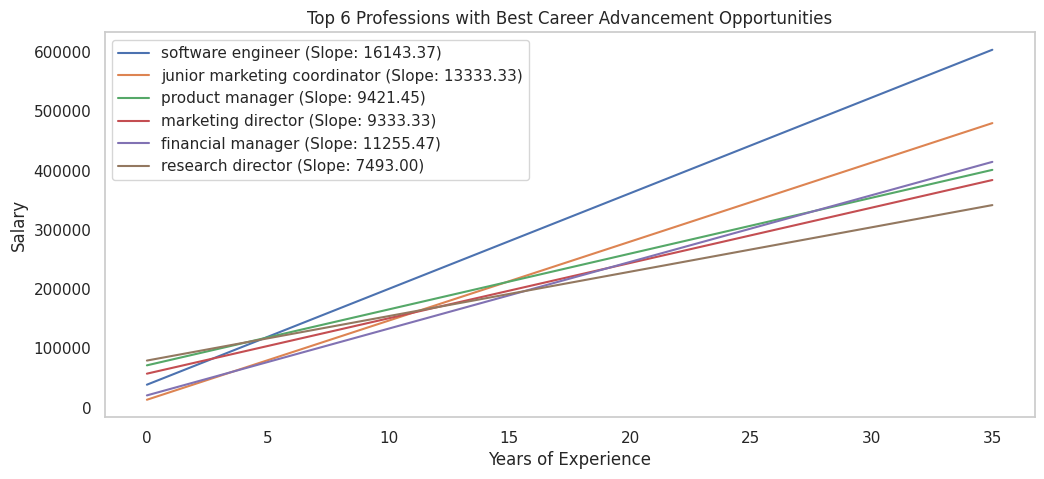

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression



# Calculate regression for each profession
areas = []
models = {}

# Career years
years = 35

for job in data['Job'].unique():
    subset = data[data['Job'] == job]
    X = subset[['Years of Experience']]
    y = subset['Salary']

    if len(X) > 5:  # Ensure sufficient data points for regression
        model = LinearRegression().fit(X, y)
        salary_start = model.predict(pd.DataFrame([[0]], columns=['Years of Experience']))[0]
        salary_end = model.predict(pd.DataFrame([[years]], columns=['Years of Experience']))[0]
        area = (salary_start + salary_end) * years / 2
        areas.append((job, area, model.coef_[0], salary_start, salary_end))
        models[job] = model

# Select top 6 professions by area
top_areas = sorted(areas, key=lambda x: x[1], reverse=True)[:6]

# Plot regression lines for top professions
plt.figure(figsize=(12, 5))
for job, _, slope, salary_start, salary_end in top_areas:
    X_line = np.array([[0], [years]])
    y_line = models[job].predict(X_line)
    plt.plot([0, years], y_line, label=f'{job} (Slope: {slope:.2f})')

plt.title('Top 6 Professions with Best Career Advancement Opportunities')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()

# Delete variables unused
del areas, models, top_areas

Steepest Salary Growth: Software Engineers have the highest salary growth rate with experience, as indicated by their steepest slope. This suggests that as a Software Engineer gains experience, their salary increases significantly.

As we try to fit the linear regression on to the data points, we can witness inconsistencies, regarding how high do advancements go. In reality starts to diminish, as high paying positions grow scarce, so do career advancement opportunities, therefore it stagnates after 10 to 15 years, growing at a much slower rate.

As we have previously noted, almost all positions require additional background, therefore assuming 35 years of experience in the field is a stretch.

### Toughs on EDA

During the *Exploratory Data Analysis* (EDA) process, biases can arise from personal beliefs, cognitive shortcuts, or methodological oversight. But, while EDA itself does not inherently eliminate bias, its iterative and transparent nature can help reduce its influence of subjective factors when used openly, without prejudice.

Even people with high *Numeracy scores*, that means high math reasoning skills, shows statistical bias towards paradigms. It was newly discovered, that one reason this might occur is due to our biological drive to fit into our community, rejecting the community's common belief is not logical. Consequently, such favoritism is strictly rational.

A popular study conducted on this subject (Danm et al, 2017), proves that even people with high numeracy scores, fail to deduct unfavorable conclusions, even if they are presented with reliable empirical data.

[Dan M. Kahan, et al., *Motivated Numeracy and Enlightened Self-Government*, Cambridge University Press, 2017](https://www.cambridge.org/core/journals/behavioural-public-policy/article/abs/motivated-numeracy-and-enlightened-selfgovernment/EC9F2410D5562EF10B7A5E2539063806)

# Confirmatory Data Analysys

**Confirmatory Data Analysis** (CDA) is a statistical approach focused on *testing* specific hypotheses or *validating* assumptions about data using formal inferential techniques. Unlike Exploratory Data Analysis (EDA), which is open-ended and aimed at discovering patterns, CDA is structured and involves statistical tests like t-tests, chi-square tests, and regression analysis to confirm or refute predefined hypotheses. CDA helps quantify relationships, measure effects, and make data-driven conclusions with a higher degree of certainty by applying rigorous statistical rules.

| Aspect | EDA | CDA |
| - | - | - |
| Purpose | Discover patterns, relationships, and anomalies. | Test specific hypotheses or validate assumptions. |
| Approach | Open-ended, flexible, and visual. | Structured, formal, and statistical. |
| Tools Used | Visualization tools, summary statistics. | Hypothesis testing, confidence intervals, regression. |
| Output | Insights and questions for further investigation. | Evidence-based conclusions about data relationships. |

EDA and CDA are **complementary techniques**. EDA serves as a precursor to CDA, helping researchers explore the data, formulate hypotheses, and identify key variables for focused analysis. CDA then rigorously tests these hypotheses using statistical methods. For instance, in a study on customer behavior, EDA might reveal a potential relationship between age and purchase frequency. CDA would then test this relationship to determine if it holds statistically. Together, EDA and CDA ensure a robust data analysis pipeline by balancing creativity and rigor.

*Countries of the World* (CW) dataset offers information about countries such as GPD, while *Global Data Salary* (GDS) records salary statistics in different countries. A scatterplot not only will allow us to visualize the correlation between the two variables, but also show any outliers.

As discussed previously, **Economic productivity** dictates that higher GPD per capita means more skilled and productive workers. Consequently, it is sensible to say, that this often translates into higher wages.

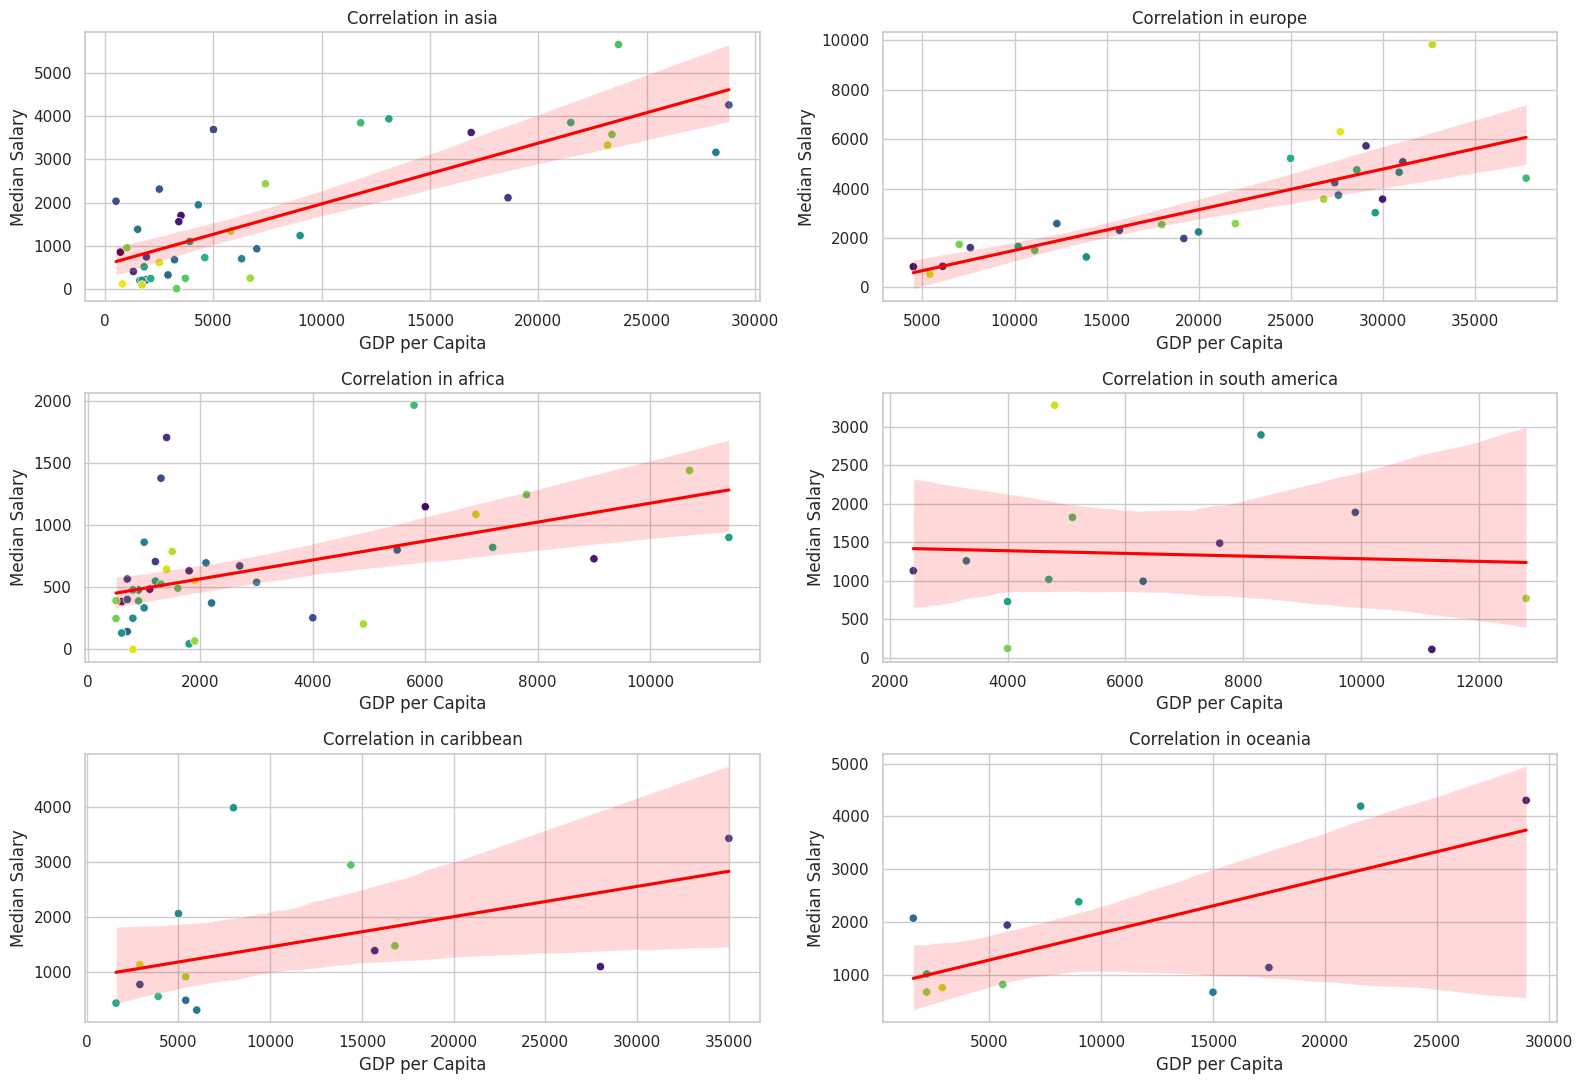

In [172]:
import numpy as np

# Merge datasets on 'Country'
merged_df = pd.merge(cw, gsd, on='Country', how='inner')

# Log-transform GDP per capita and Median Salary (optional)
merged_df['Log GDP per capita'] = np.log(merged_df['GDP per capita'])
merged_df['Log Median Salary'] = np.log(merged_df['Median'])

# Filter relevant columns
merged_df = merged_df[['Country', 'Continent', 'GDP per capita', 'Median']]

# Drop rows with missing values
merged_df = merged_df.dropna()

# Group data by continent
continents = merged_df['Continent'].unique()

# Create 6 separate scatter plots
plt.figure(figsize=(16, 11))

for i, continent in enumerate(continents[:6], 1):  # Limit to first 6 groups if more exist
    subset = merged_df[merged_df['Continent'] == continent]

    plt.subplot(3, 2, i)  # Create a grid of 2 rows, 3 columns
    sns.scatterplot(
        data=subset,
        x='GDP per capita',
        y='Median',
        hue='Country',
        palette='viridis',
        legend=False
    )
    sns.regplot(
        data=subset,
        x='GDP per capita',
        y='Median',
        scatter=False,
        color='red'
    )
    plt.title(f'Correlation in {continent}')
    plt.xlabel('GDP per Capita')
    plt.ylabel('Median Salary')

plt.tight_layout()
plt.show()

del merged_df, continents

The scatterplot contains linear regressions in order to better understand the correlation between the two variables. While hardly correlated, GPD per capita alone does not explain the Median Salary distribution for countries. Therefore we will conduct a linear regression across as many features as we can model. Although there are a few criteria to keep in mind:

- **Exogenity:** The bias is independent of the values, and has an expected value of 0. The residuals are dependent of each other.
- **Independent Isotrophy:** The variance of the bias is invariant for the samples, and is independent across features.
- **Normality** The bias follows a normal distribution.
- **Linear Independence:** Every probability variable is independent. Due to our sample size, we will define independent variables those, that have a correlation less then *0.5*

*Collinearity* occurs when the Linear Independence criteria is does not hold up. This occurs when a variable can be obtained by combining other varibles. As a consequence the problem is ill-posed, as we have less information to determine the model parameters.

Examining the *rank* of the feature matrix attemps to determine the presence of collinearity. Analysing the correlation matrix, or using the singular value decomposition technique, can identify the presence of collinearity.

Consequently, choosing the features is an importan part in *linear regression*. In case of **Population Density** or **GPD per capita**, collinearity occurs, if both Area and Population or Population and GPD features are included in the feature set. Let's start by choosing which features should we take into consideration.

<ipython-input-184-d5ba3b8a344b>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  colors = abs_correlation.applymap(color_map)


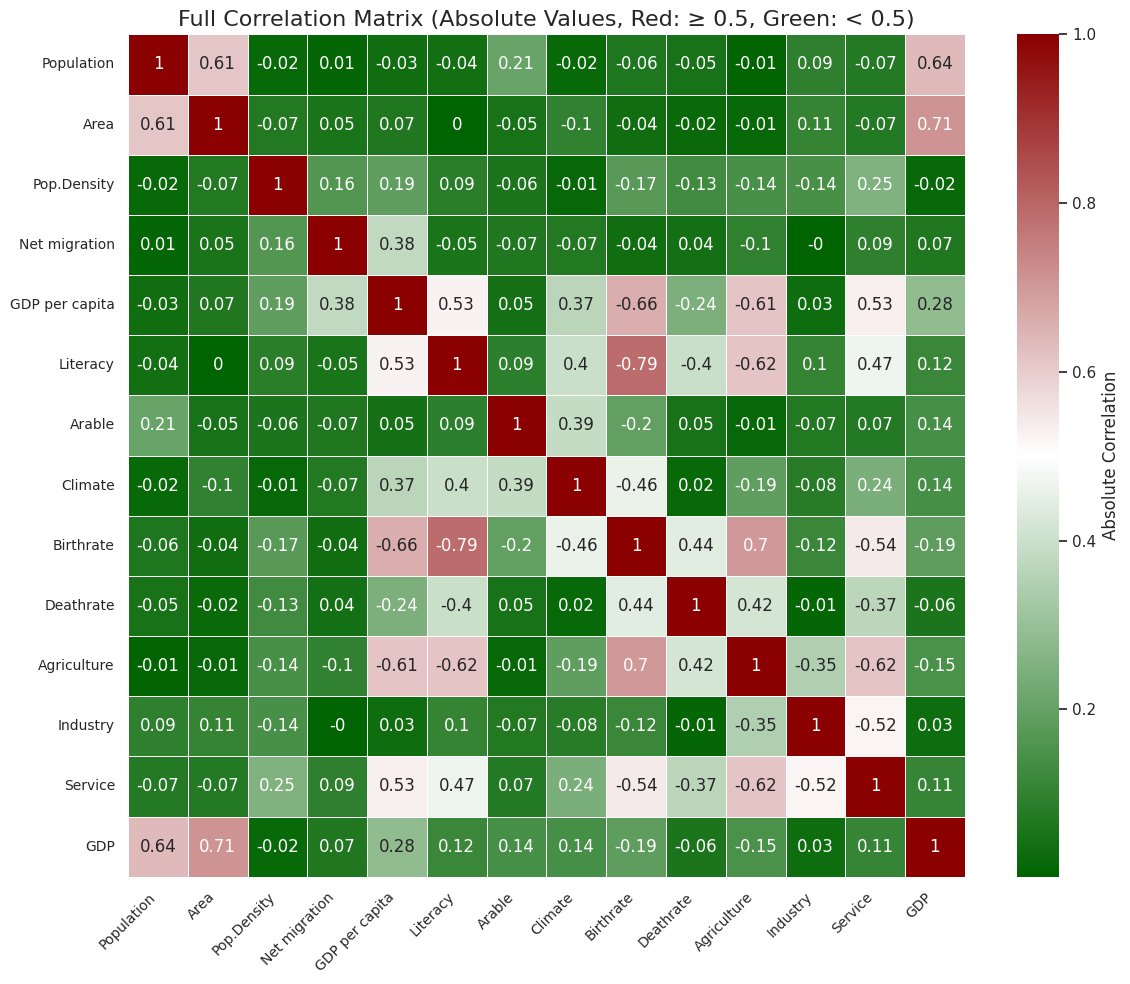

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Select only numerical columns for correlation matrix
numerical_df = cw.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Take the absolute values of the correlation matrix
abs_correlation = correlation_matrix.abs()

# Define a custom function to map colors based on threshold
def color_map(value):
    return 'red' if value >= 0.5 else 'green'

# Create a matrix with colors based on absolute correlation values
colors = abs_correlation.applymap(color_map)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Custom color map: gradient for green (closer to 0) and red (closer to 1)
colors_gradient = {
    "red": [(0.0, "white"), (0.5, "lightcoral"), (1.0, "darkred")],
    "green": [(0.0, "white"), (0.5, "lightgreen"), (1.0, "darkgreen")],
}

# Combine the two gradients into one custom colormap
red_green_cmap = LinearSegmentedColormap.from_list(
    "red_green",
    [(0, "darkgreen"), (0.5, "white"), (1, "darkred")],
    N=256
)

# Plot the heatmap with absolute correlations
sns.heatmap(
    abs_correlation,  # Use absolute correlation matrix
    annot=correlation_matrix.round(2),  # Show original correlation values with 2 decimal points
    cmap=red_green_cmap,  # Green for weak, Red for strong correlation
    center=0.5,  # Threshold at 0.5
    linewidths=0.5,
    cbar_kws={"label": "Absolute Correlation"}
)

# Customize the plot
plt.title("Full Correlation Matrix (Absolute Values, Red: ≥ 0.5, Green: < 0.5)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

# Clean up variables
del numerical_df, correlation_matrix, abs_correlation, colors


Considering the above correlation matrix, the feature set consist of the following labels: (Area, Population Density, Net migration, GPD per capita, Arable land, Climate, Literacy, and Industy).

ALthough, previously, we have discussed the important correlation between Literacy and GPD per capita, I have considered both features, in order to model the relative importance in determining the median salary for a country. Unfortunately, modelling the Service industry is not compatible with the technique as it bolsters to high of a correlation with both GPD per capiata and Literacy.

----

Linear regression is one of the most fundamental and widely used techniques in statistical modeling and machine learning. It is used to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a straight line (or hyperplane) to the data.

Linear regression assumes that the relationship between the dependent variable YY and the independent variables XX is linear, meaning it can be represented as a weighted sum of the input features plus a constant term (intercept). In the case of multiple linear regression, where there are several predictors, the equation generalizes to:

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon$

In [190]:
import sklearn.linear_model

# Merge datasets on the 'Country' column
# No rows with missing values
data = pd.merge(gsd, cw, on="Country")

# Choose model feautres (X)
features = ["Area", "Pop.Density", "Net migration", "Arable", "GDP per capita", "Literacy", "Climate", "Industry"]
X = data[features]
Y = data["Median"]

# Standardize the data for extracting stats
X_norm = (X - X.mean()) / X.std()
Y_norm = (Y - Y.mean()) / Y.std()

# Define model using Scikit-learn
regression = sklearn.linear_model.LinearRegression()
model = regression.fit(X_norm, Y_norm)
print(f"The parameters of the model are:")
print(model.coef_)

The parameters of the model are:
[ 0.08781308  0.07414276  0.03636659 -0.07331429  0.6956119   0.07188203
  0.04801076  0.02558352]


Standardizing both the feature matrix and the prediction matrix offers a more portable and appealing form for the model, as features can have orders of magnituse higher values. For example, while *service* and *literacy* may be values expressed as a percentage, variables like *population* and *GDP per capita* can have multiple digits.

The model can be used with non standard inputs as well. In the first part of the tutorial, we have assessed the mean and standard distribution for quite some features. Using this information, we can standardize any input parameter. As this process is reversable, the output can be provided in a traditional format as well (as we know the expected value and standard deviation for the median salary).

The normalized format of the model parameters allows for the visualization of relative importance of determining median salary.

<ipython-input-196-fd9abedd6dd4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Weight", y="Feature", data=weights, palette="viridis")


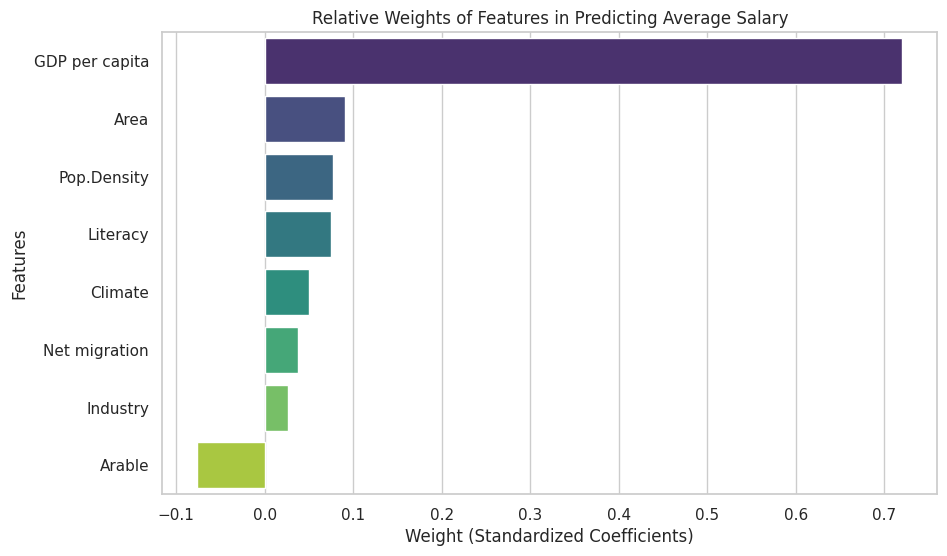

In [196]:
# Obtain standardized parameters
coefficients = model.coef_ / model.coef_.sum()

# Create a dataframe for visualization
weights = pd.DataFrame({"Feature": features, "Weight": coefficients})
weights = weights.sort_values(by="Weight", ascending=False)

# Plot the weights
plt.figure(figsize=(10, 6))
sns.barplot(x="Weight", y="Feature", data=weights, palette="viridis")

# Add labels and title
plt.title("Relative Weights of Features in Predicting Median Salary")
plt.xlabel("Weight (Standardized Coefficients)")
plt.ylabel("Features")
plt.show()

del weights

The feature "GDP per capita" has by far the highest standardized weight (~0.7), significantly larger than any other feature. This indicates that GDP per capita has the strongest positive relationship with average salary. In simpler terms, countries with higher GDP per capita tend to have higher average salaries.

The feature "Arable" has a small negative weight, meaning that countries with higher arable land proportions may have slightly lower average salaries when controlling for other variables. This could suggest, that countries with significant portion of the GPD supplied by agricultre, may not yet be fully industrialized or urbanized, which limits the availability of higher-paying jobs in technology, finance, or manufacturing.

---


To evaluate the fitness or performance of a linear regression model, several statistical metrics are commonly used. These metrics assess how well the model fits the data and provide insights into its accuracy, efficiency, and potential shortcomings. Below is a detailed explanation of the most commonly used metrics:

**R-Squared:** The R-squared value measures the proportion of variance in the target variable Y that is explained by the independent variables X. It provides a measure of the overall goodness of fit of the linear regression model. A value closer to 1 is desirable. The more features are added to the input feature set, the higher the goodness-of-fit.

${R}^2 = 1 - \frac{SS_{residual}}{SS_{total}}$

**Mean Absolute Error:** The Mean Absolute Error is the average of the absolute differences between actual and predicted values. It measures the model's error in terms of the absolute magnitude.

**T-test:** A t-test is a statistical test used to determine whether there is a significant difference between the means of two groups, or between a group mean and a known value. It is commonly used when the sample size is small, and the population standard deviation is unknown. The t-test is based on the Student's t-distribution, which is used to estimate the population mean when the sample size is small.

The t-test helps in hypothesis testing by comparing observed data with an expected outcome under the null hypothesis. A small p-value (p<0.05p<0.05) suggests strong evidence against the null hypothesis, leading to its rejection. A large p-value (p>0.05p>0.05) indicates insufficient evidence to reject the null hypothesis.

In [197]:
from scipy import stats

# Calculate average error
error = Y_norm - model.predict(X_norm)

# The error is assumed to be a normal distribution with 0 expected value and sigma standard deviation.
print(f"The error of the model has {error.mean():.5} expected value with {error.std():.5} standard deviation")

# Calculate the goodness of fit
def r_sqared(model, X, Y):
  Y_pred = model.predict(X)

  # Calculate total sum of squares and residual sum of squares
  SS_tot = np.sum((Y - np.mean(Y)) ** 2)
  SS_res = np.sum((Y - Y_pred) ** 2)
  return 1 - (SS_res / SS_tot)

# What amount of varience is explained by the model
gof = r_sqared(model, X_norm, Y_norm)
print(f"The goodness of fit score is: {gof:.5} (closer to 1 is better)")

# T-teszt proba a residualokra
test_result = stats.ttest_1samp(error, 0)
print(f"Quality of the statistics: {test_result.statistic:.5} with pvalue of {test_result.pvalue}")

del test_result, gof

The error of the model has 1.6448e-17 expected value with 0.59857 standard deviation
The goodness of fit score is: 0.64171 (closer to 1 is better)
Quality of the statistics: 3.4974e-16 with pvalue of 0.9999999999999998


The model explains a substantial portion of the target variable, but it is not perfect. This could be due to a non linear function between the features, or some degree of multicolliniairity among varibles. This can be further improved by addig more relevant features. These results suggest that your linear regression model is reasonably good, but it is not perfect.

---

The Intersection over Union (IoU), when applied to the distributions of predicted values and actual values, can provide valuable insights into the statistical correctness of a regression model. While IoU is traditionally used in computer vision for overlap in object detection, using it to compare probability distributions of predicted and actual values is an innovative way to assess model accuracy. By comparing the distributions using IoU, you gain the following insights:

- **Bias Detection**: If the IoU is low and the predicted values are shifted compared to the actual values, it indicates systematic bias in the model predictions.
- **Variance Assessment**: A model that underestimates or overestimates the spread (standard deviation) will show reduced overlap, leading to a lower IoU.
- **Model Fit Quality**: IoU serves as a global measure of model fit, encompassing mean, variance, and shape. It complements point-based metrics like RMSE and MAE, which only focus on individual errors.
- **Distribution Consistency**: IoU provides a visual and numerical comparison of the entire predicted and actual distributions, offering insights beyond point estimates.

As

Intersection of Union: 0.8504465353631807


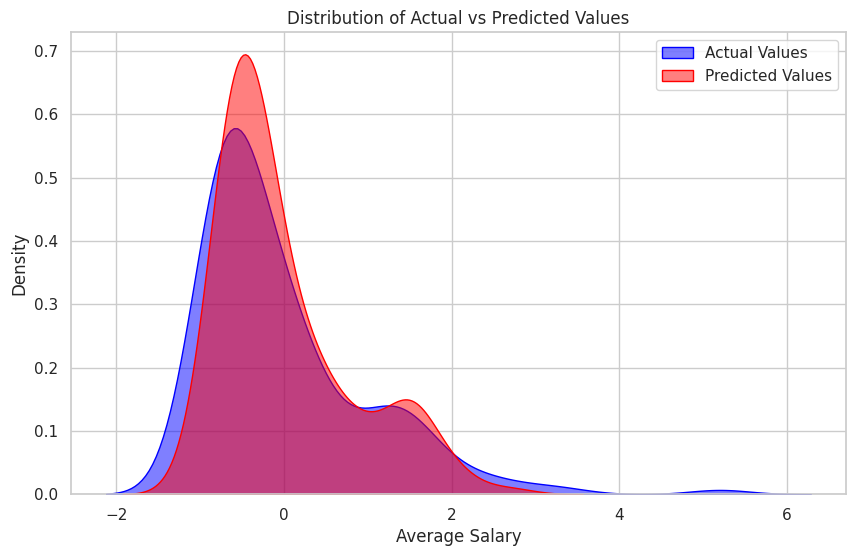

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def calculate_iou(Y_pred, Y_norm):
    # Compute KDE (Kernel Density Estimate) for Actual and Predicted values
    kde_actual = gaussian_kde(Y_norm)  # KDE for actual values
    kde_predicted = gaussian_kde(Y_pred)  # KDE for predicted values

    # Define a common range of x values for integration
    x_values = np.linspace(min(Y_norm.min(), Y_pred.min()), max(Y_norm.max(), Y_pred.max()), 1000)

    # Evaluate the densities at each x value
    actual_density = kde_actual(x_values)
    predicted_density = kde_predicted(x_values)

    # Compute the Intersection (min of the two densities at each point)
    intersection_density = np.minimum(actual_density, predicted_density)
    area_intersection = np.trapz(intersection_density, x_values)

    # Compute the Union (sum of the two densities minus their intersection)
    union_density = np.maximum(actual_density, predicted_density)
    area_union = np.trapz(union_density, x_values)

    # Intersection over Union (IoU)
    iou = area_intersection / area_union
    return iou

# Predict the target values using the trained model
Y_pred = model.predict(X_norm)

# Create a DataFrame to hold actual and predicted values
results = pd.DataFrame({
    "Actual": Y_norm,
    "Predicted": Y_pred
})

# Calculate intersection of union (IoU)
print(f"Intersection of Union: {calculate_iou(Y_pred, Y_norm)}")

# Plot the distribution of Actual and Predicted values using kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(results["Actual"], label="Actual Values", fill=True, color="blue", alpha=0.5)
sns.kdeplot(results["Predicted"], label="Predicted Values", fill=True, color="red", alpha=0.5)

# Add labels and legend
plt.title("Distribution of Actual vs Predicted Values")
plt.xlabel("Average Salary")
plt.ylabel("Density")
plt.legend()
plt.show()

del iou, results